# Status + LTD

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import lines
import pandas as pd
import scipy.special
from pathlib import Path
from statsmodels.graphics.tsaplots import plot_acf
import networkx as nx
import os
import plotly.graph_objects as go
import networkx as nx

import matplotlib as mpl

In [2]:
n2_triads = ["tr1", "tr2", "tr4"]
n1_triads = ["tr3", "tr5", "tr6"]
deg_triads = [*n1_triads, *n2_triads]
all_triads = ["tr" + str(i) for i in range(8)]

n1_triads = ['tr3', 'tr5', 'tr6']
n1_nohierarchical = 'tr5'
n2_triads = ['tr1', 'tr2', 'tr4']
n2_nonhierarchical = 'tr2'

triad_names_map={
    'tr7': 'BH0',
    'tr4': 'BH1',
    'tr1': 'BH2',
    'tr2': 'BN1',
    'tr0': 'UH2',
    'tr3': 'UH1',
    'tr5': 'UN1',
    'tr6': 'UH0',
}
triad_names_map.update({value: key for key, value in triad_names_map.items()})


# Specific classes stats

In [3]:
specific_schools = ["t11_10", "t11_9", "t11_8", "t11_7", "t11_6", "t11_5", "t11_4", "t11_3", "t11_2", "t11_1", "t1", "t2", "t6"]

path = Path('/home/pgorski/Desktop/data/spanish-highschools/')

arrays = []
datanames = []
dfs = []
for school in specific_schools:
    i = 1
    while True:
        if not os.path.isfile(path.joinpath("Triads_stats_" + school + "_" + str(i) + ".pickle")):
            break
        array = pd.read_pickle(path.joinpath("Triads_stats_" + school + "_" + str(i) + ".pickle"))
        arrays.append(array)
        datanames.append(school + "_" + str(i))
        dfs.append(pd.read_csv(path.joinpath("Triads_" + school + "_" + str(i) + ".csv")))
        i += 1



In [12]:
low_dens_ind = np.where(np.array(datanames) == 't11_8_1')[0][0]

dfs[low_dens_ind]

,a,b,c,ab,bc,ac
0,2112,2138,2143,1,1,1
1,2112,2141,2146,1,-1,1
2,2112,2141,2148,1,-1,1
3,2112,2141,2153,1,-1,1
4,2112,2141,2158,1,-1,1
...,...,...,...,...,...,...
3079,2202,2163,2145,1,1,1
3080,2202,2163,2146,1,1,1
3081,2202,2163,2153,1,1,1
3082,2202,2163,2160,1,1,1


In [5]:
schools_all_nodes = [np.unique([*df.a, *df.b, *df.c]) for df in dfs]
schools_a_nodes = [np.unique(df.a) for df in dfs]


In [6]:
schools_orig_agents_to_new_inds_dict = [{key: val for key, val in zip(school_all_nodes, list(range(0,len(school_all_nodes))))} for school_all_nodes in schools_all_nodes]

schools_n_agents = list(map(len, schools_all_nodes))
elist_schools = [{} for _ in schools_all_nodes]

every = 0.6
for i, (df, school_orig_agents_to_new_inds_dict) in enumerate(zip(dfs, schools_orig_agents_to_new_inds_dict)):
    start = every
    it = 0.
    rows = len(df.index)
    for ind, row in df.iterrows():
        ags = [row.a, row.b, row.c]
        ags = [school_orig_agents_to_new_inds_dict[ag] for ag in ags]
        links = [[ags[0], ags[1]], [ags[0], ags[2]], [ags[1], ags[2]] ]
        pols = [row.ab, row.ac, row.bc]
        for link, pol in zip(links, pols):
            elist_schools[i][(link[0], link[1])] = pol
        
        if it / rows > start:
            start += every
            # print("Finished " + str(it/rows * 100) + "%.")
        it += 1
elist_schools

[{(0, 74): -1,
  (0, 76): 1,
  (74, 76): 1,
  (0, 77): 1,
  (74, 77): 1,
  (0, 78): -1,
  (74, 78): 1,
  (0, 79): 1,
  (74, 79): 1,
  (0, 80): -1,
  (74, 80): 1,
  (0, 83): 1,
  (74, 83): 1,
  (0, 84): -1,
  (74, 84): 1,
  (0, 85): -1,
  (74, 85): 1,
  (0, 87): -1,
  (74, 87): 1,
  (0, 88): 1,
  (74, 88): 1,
  (0, 92): 1,
  (74, 92): 1,
  (76, 77): 1,
  (76, 80): 1,
  (77, 74): 1,
  (77, 76): 1,
  (77, 78): 1,
  (77, 79): 1,
  (77, 80): 1,
  (77, 83): 1,
  (77, 84): 1,
  (77, 85): 1,
  (77, 87): 1,
  (77, 88): 1,
  (0, 89): -1,
  (77, 89): 1,
  (77, 92): 1,
  (78, 74): 1,
  (78, 76): 1,
  (78, 77): 1,
  (78, 79): 1,
  (78, 80): 1,
  (78, 83): 1,
  (78, 84): 1,
  (78, 85): 1,
  (78, 87): 1,
  (78, 88): 1,
  (78, 89): 1,
  (78, 92): 1,
  (79, 78): 1,
  (79, 80): 1,
  (80, 76): 1,
  (80, 77): 1,
  (80, 78): 1,
  (80, 79): 1,
  (80, 83): -1,
  (83, 74): 1,
  (83, 76): 1,
  (83, 78): 1,
  (83, 79): -1,
  (83, 80): -1,
  (83, 84): 1,
  (83, 85): 1,
  (83, 87): -1,
  (83, 88): 1,
  (83, 89): 

In [7]:
elist_schools[low_dens_ind]

# schools_all_nodes[low_dens_ind]

{(0, 2): 1,
 (0, 4): 1,
 (2, 4): 1,
 (0, 6): -1,
 (2, 6): -1,
 (0, 7): 1,
 (2, 7): 1,
 (0, 9): 1,
 (2, 9): 1,
 (0, 10): 1,
 (2, 10): 1,
 (0, 12): 1,
 (2, 12): 1,
 (0, 21): 1,
 (2, 21): 1,
 (0, 66): 1,
 (2, 66): -1,
 (0, 71): 1,
 (2, 71): 1,
 (0, 109): 1,
 (2, 109): 1,
 (0, 121): 1,
 (2, 121): 1,
 (0, 127): 1,
 (2, 127): 1,
 (0, 133): 1,
 (2, 133): 1,
 (0, 134): 1,
 (2, 134): 1,
 (0, 138): 1,
 (2, 138): 1,
 (0, 143): 1,
 (2, 143): 1,
 (0, 145): 1,
 (2, 145): 1,
 (4, 2): 1,
 (4, 6): -1,
 (0, 8): 1,
 (4, 8): 1,
 (4, 9): 1,
 (4, 10): 1,
 (0, 11): 1,
 (4, 11): 1,
 (4, 12): 1,
 (0, 16): 1,
 (4, 16): 1,
 (4, 21): 1,
 (0, 99): 1,
 (4, 99): -1,
 (4, 127): 1,
 (4, 134): 1,
 (0, 139): 1,
 (4, 139): 1,
 (4, 143): 1,
 (6, 9): -1,
 (6, 10): 1,
 (6, 12): -1,
 (0, 13): 1,
 (6, 13): -1,
 (0, 14): 1,
 (6, 14): -1,
 (0, 15): 1,
 (6, 15): -1,
 (6, 99): -1,
 (6, 143): -1,
 (7, 2): 1,
 (7, 4): 1,
 (7, 9): 1,
 (7, 10): 1,
 (7, 12): 1,
 (7, 21): 1,
 (7, 71): 1,
 (0, 92): 1,
 (7, 92): 1,
 (7, 109): 1,
 (7, 121

In [13]:
G = nx.DiGraph()
G.add_nodes_from(range(len(schools_all_nodes[low_dens_ind])))
G.nodes()

G.add_edges_from(list(elist_schools[low_dens_ind].keys()))
G.edges


OutEdgeView([(0, 13), (0, 16), (0, 15), (0, 19), (0, 21), (0, 24), (0, 26), (0, 29), (0, 31), (0, 18), (0, 27), (0, 30), (0, 50), (0, 48), (1, 39), (1, 40), (1, 42), (1, 43), (1, 44), (1, 45), (1, 46), (1, 48), (2, 0), (2, 13), (2, 15), (2, 16), (2, 18), (2, 19), (2, 21), (2, 24), (2, 48), (2, 1), (2, 39), (2, 42), (2, 43), (2, 44), (2, 45), (2, 46), (2, 3), (2, 33), (2, 36), (2, 4), (2, 5), (2, 6), (2, 7), (2, 8), (2, 9), (2, 10), (2, 11), (2, 12), (2, 14), (2, 25), (2, 49), (2, 20), (2, 34), (2, 41), (2, 47), (2, 35), (2, 17), (3, 33), (3, 36), (3, 48), (3, 26), (3, 50), (4, 0), (4, 1), (4, 3), (4, 5), (4, 6), (4, 7), (4, 8), (4, 9), (4, 10), (4, 11), (4, 12), (4, 13), (4, 14), (4, 15), (4, 16), (4, 2), (5, 0), (5, 1), (5, 4), (5, 6), (5, 7), (5, 9), (5, 10), (5, 11), (5, 13), (5, 14), (5, 15), (5, 16), (5, 18), (5, 24), (5, 25), (5, 49), (5, 2), (5, 31), (5, 37), (5, 28), (6, 0), (6, 1), (6, 3), (6, 8), (6, 9), (6, 10), (6, 11), (6, 13), (6, 15), (6, 43), (6, 2), (7, 1), (7, 9), (7,

In [14]:
for a, b in elist_schools[low_dens_ind]:
    G[a][b]['weight'] = elist_schools[low_dens_ind][a,b] + 2
    
G.edges

OutEdgeView([(0, 13), (0, 16), (0, 15), (0, 19), (0, 21), (0, 24), (0, 26), (0, 29), (0, 31), (0, 18), (0, 27), (0, 30), (0, 50), (0, 48), (1, 39), (1, 40), (1, 42), (1, 43), (1, 44), (1, 45), (1, 46), (1, 48), (2, 0), (2, 13), (2, 15), (2, 16), (2, 18), (2, 19), (2, 21), (2, 24), (2, 48), (2, 1), (2, 39), (2, 42), (2, 43), (2, 44), (2, 45), (2, 46), (2, 3), (2, 33), (2, 36), (2, 4), (2, 5), (2, 6), (2, 7), (2, 8), (2, 9), (2, 10), (2, 11), (2, 12), (2, 14), (2, 25), (2, 49), (2, 20), (2, 34), (2, 41), (2, 47), (2, 35), (2, 17), (3, 33), (3, 36), (3, 48), (3, 26), (3, 50), (4, 0), (4, 1), (4, 3), (4, 5), (4, 6), (4, 7), (4, 8), (4, 9), (4, 10), (4, 11), (4, 12), (4, 13), (4, 14), (4, 15), (4, 16), (4, 2), (5, 0), (5, 1), (5, 4), (5, 6), (5, 7), (5, 9), (5, 10), (5, 11), (5, 13), (5, 14), (5, 15), (5, 16), (5, 18), (5, 24), (5, 25), (5, 49), (5, 2), (5, 31), (5, 37), (5, 28), (6, 0), (6, 1), (6, 3), (6, 8), (6, 9), (6, 10), (6, 11), (6, 13), (6, 15), (6, 43), (6, 2), (7, 1), (7, 9), (7,

In [16]:
nx.write_gexf(G, "t11_8_1_.gexf")

In [17]:
G = nx.DiGraph()
G.add_nodes_from(range(len(schools_all_nodes[low_dens_ind])))
G.nodes()

G.add_edges_from(list(elist_schools[low_dens_ind].keys()))
G.edges

for a, b in elist_schools[low_dens_ind]:
    G[a][b]['polarity'] = elist_schools[low_dens_ind][a,b]
    
nx.write_gexf(G, "t11_8_1_2.gexf")

In [18]:
G_pos = nx.DiGraph()
G_neg = nx.DiGraph()


for a, b in elist_schools[low_dens_ind]:
    if elist_schools[low_dens_ind][a,b] > 0:
        G_pos.add_edge(a,b)
    else:
        G_neg.add_edge(a,b)
    # G[a][b]['polarity'] = elist_schools[low_dens_ind][a,b]
    
nx.write_gexf(G_pos, "t11_8_1_pos.gexf")
nx.write_gexf(G_neg, "t11_8_1_neg.gexf")

In [47]:
pos = nx.spring_layout(G)
pos = nx.spectral_layout(G)

# nx.draw_networkx(G, pos)
go.Figure(G)


ValueError: 
    Invalid element(s) received for the 'data' property of 
        Invalid elements include: [<networkx.classes.digraph.DiGraph object at 0x7f0a4f629ca0>]

    The 'data' property is a tuple of trace instances
    that may be specified as:
      - A list or tuple of trace instances
        (e.g. [Scatter(...), Bar(...)])
      - A single trace instance
        (e.g. Scatter(...), Bar(...), etc.)
      - A list or tuple of dicts of string/value properties where:
        - The 'type' property specifies the trace type
            One of: ['bar', 'barpolar', 'box', 'candlestick',
                     'carpet', 'choropleth', 'choroplethmapbox',
                     'cone', 'contour', 'contourcarpet',
                     'densitymapbox', 'funnel', 'funnelarea',
                     'heatmap', 'heatmapgl', 'histogram',
                     'histogram2d', 'histogram2dcontour', 'icicle',
                     'image', 'indicator', 'isosurface', 'mesh3d',
                     'ohlc', 'parcats', 'parcoords', 'pie',
                     'pointcloud', 'sankey', 'scatter',
                     'scatter3d', 'scattercarpet', 'scattergeo',
                     'scattergl', 'scattermapbox', 'scatterpolar',
                     'scatterpolargl', 'scattersmith',
                     'scatterternary', 'splom', 'streamtube',
                     'sunburst', 'surface', 'table', 'treemap',
                     'violin', 'volume', 'waterfall']

        - All remaining properties are passed to the constructor of
          the specified trace type

        (e.g. [{'type': 'scatter', ...}, {'type': 'bar, ...}])

In [19]:
high_dens_ind = np.where(np.array(datanames) == 't11_4_4')[0][0]

dfs[high_dens_ind]


,a,b,c,ab,bc,ac
0,5014,5016,5019,-1,1,-1
1,5014,5016,5025,-1,1,1
2,5014,5016,5028,-1,1,-1
3,5014,5018,5025,1,1,1
4,5014,5018,5030,1,1,1
...,...,...,...,...,...,...
1371,5041,5039,5017,1,1,1
1372,5041,5040,5015,1,1,1
1373,5041,5040,5020,1,1,1
1374,5041,5040,5034,1,1,1


In [20]:
G2 = nx.DiGraph()
G2.add_nodes_from(range(len(schools_all_nodes[high_dens_ind])))
G2.nodes()

G2.add_edges_from(list(elist_schools[high_dens_ind].keys()))
G2.edges


OutEdgeView([(0, 2), (0, 5), (0, 10), (0, 12), (0, 4), (0, 14), (0, 7), (0, 11), (0, 20), (0, 16), (0, 17), (1, 13), (1, 15), (1, 16), (1, 17), (1, 22), (1, 24), (2, 5), (2, 10), (2, 12), (2, 8), (2, 9), (2, 21), (2, 18), (2, 25), (2, 13), (2, 23), (2, 19), (3, 0), (3, 7), (3, 11), (3, 12), (3, 14), (3, 20), (3, 6), (3, 8), (3, 18), (3, 19), (3, 23), (3, 25), (3, 15), (3, 21), (3, 13), (3, 22), (4, 10), (4, 14), (4, 0), (5, 2), (5, 12), (5, 8), (5, 9), (5, 21), (5, 6), (6, 8), (6, 11), (6, 18), (6, 19), (6, 20), (6, 23), (6, 25), (6, 3), (6, 17), (6, 24), (7, 5), (7, 11), (7, 15), (7, 18), (7, 23), (7, 3), (8, 5), (8, 9), (8, 10), (8, 12), (8, 18), (8, 21), (8, 25), (8, 2), (9, 5), (9, 8), (9, 12), (9, 18), (9, 21), (10, 2), (10, 4), (10, 12), (10, 14), (10, 20), (10, 13), (10, 0), (10, 22), (11, 5), (11, 7), (11, 10), (11, 14), (11, 0), (11, 6), (11, 8), (11, 13), (11, 15), (11, 18), (11, 22), (11, 23), (11, 25), (11, 3), (12, 2), (12, 4), (12, 5), (12, 10), (12, 20), (12, 8), (12, 9)

In [21]:
for a, b in elist_schools[high_dens_ind]:
    G2[a][b]['weight'] = elist_schools[high_dens_ind][a,b] + 2
    
G2.edges

OutEdgeView([(0, 2), (0, 5), (0, 10), (0, 12), (0, 4), (0, 14), (0, 7), (0, 11), (0, 20), (0, 16), (0, 17), (1, 13), (1, 15), (1, 16), (1, 17), (1, 22), (1, 24), (2, 5), (2, 10), (2, 12), (2, 8), (2, 9), (2, 21), (2, 18), (2, 25), (2, 13), (2, 23), (2, 19), (3, 0), (3, 7), (3, 11), (3, 12), (3, 14), (3, 20), (3, 6), (3, 8), (3, 18), (3, 19), (3, 23), (3, 25), (3, 15), (3, 21), (3, 13), (3, 22), (4, 10), (4, 14), (4, 0), (5, 2), (5, 12), (5, 8), (5, 9), (5, 21), (5, 6), (6, 8), (6, 11), (6, 18), (6, 19), (6, 20), (6, 23), (6, 25), (6, 3), (6, 17), (6, 24), (7, 5), (7, 11), (7, 15), (7, 18), (7, 23), (7, 3), (8, 5), (8, 9), (8, 10), (8, 12), (8, 18), (8, 21), (8, 25), (8, 2), (9, 5), (9, 8), (9, 12), (9, 18), (9, 21), (10, 2), (10, 4), (10, 12), (10, 14), (10, 20), (10, 13), (10, 0), (10, 22), (11, 5), (11, 7), (11, 10), (11, 14), (11, 0), (11, 6), (11, 8), (11, 13), (11, 15), (11, 18), (11, 22), (11, 23), (11, 25), (11, 3), (12, 2), (12, 4), (12, 5), (12, 10), (12, 20), (12, 8), (12, 9)

In [22]:
nx.write_gexf(G, "t11_4_4.gexf")

In [23]:
G = nx.DiGraph()
G.add_nodes_from(range(len(schools_all_nodes[high_dens_ind])))
G.nodes()

G.add_edges_from(list(elist_schools[high_dens_ind].keys()))
G.edges

for a, b in elist_schools[high_dens_ind]:
    G[a][b]['polarity'] = elist_schools[high_dens_ind][a,b]
    
nx.write_gexf(G, "t11_4_4_2.gexf")

In [24]:
G_pos = nx.DiGraph()
G_neg = nx.DiGraph()


for a, b in elist_schools[high_dens_ind]:
    if elist_schools[high_dens_ind][a,b] > 0:
        G_pos.add_edge(a,b)
    else:
        G_neg.add_edge(a,b)
    # G[a][b]['polarity'] = elist_schools[low_dens_ind][a,b]
    
nx.write_gexf(G_pos, "t11_4_4_pos.gexf")
nx.write_gexf(G_neg, "t11_4_4_neg.gexf")

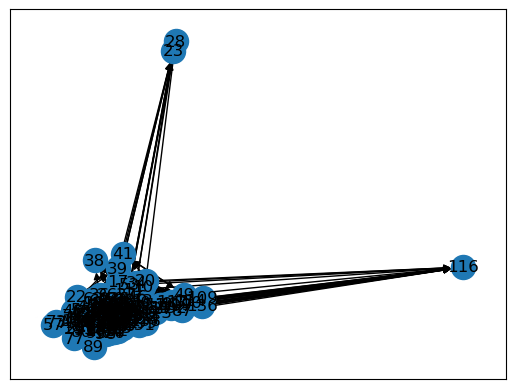

In [50]:
pos = nx.spring_layout(G)
# pos = nx.spectral_layout(G)

nx.draw_networkx(G, pos)
# go.Figure(G)


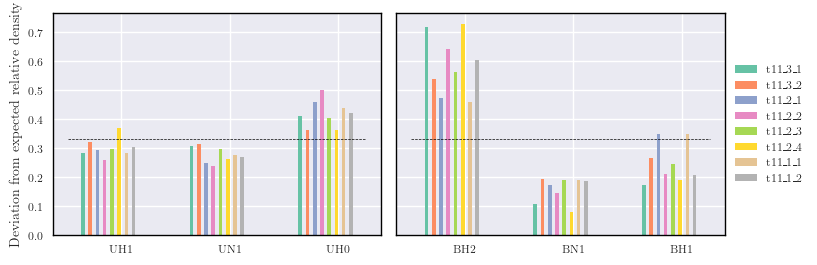

In [33]:
"""Many points
"""


save_ = True
fun_prepare_data = prepare_data4
linewidth = 0.5
addon = "_lvl"
orientation = 'h' # 'v' or 'h'
which_ticks = 'zero' #'zero', 'normal'
which_group = 2 #there can be `group_size` bars (8 at max). If data has more, which to show. If `add_real_data == True`, then there should be 7 at max. 
group_sizes = [12,8,8]
add_real_data = False
show_error = False
show_rho = False

dataset_start = sum(group_sizes[0:which_group])
dataset_end = sum(group_sizes[0:which_group+1])

# reverse = True

width = 345
figsize = set_size(width)
# figsize = (figsize[0] * 1.7, figsize[1])

# sim_data = mean_data.copy()
# sim_data_std = std_data.copy()
# real_data = results_realnet.copy()
# if reverse:
#     order = results_realnet.columns.tolist()
#     order.reverse()
#     real_data = results_realnet[order]
    
#     order = mean_data.columns.tolist()
#     order.reverse()
#     sim_data = sim_data[order]
#     std_data_std = std_data[order]

# triads = ['tr2', 'tr6', 'tr5', 'tr1']
all_sets = [n1_triads, n2_triads]

if orientation == 'v':
    figsize = (figsize[0] , figsize[1] * 1.5)
elif orientation == 'h':
    figsize = (figsize[0]*1.8 , figsize[1])

if fun_prepare_data == prepare_data5:
    line_level = 0
else:
    line_level = 1/3


if orientation == 'v':
    fig, axes = plt.subplots(2, 1, figsize=figsize, sharey=True)
elif orientation == 'h':
    fig, axes = plt.subplots(1, 2, figsize=figsize, sharey=True)
# fig, axes = plt.subplots(1, 1, figsize=figsize, sharey=True)

# Simulated nets
colors = sns.color_palette("Set2").as_hex()[:30]
# sim_labels = [r'$q={q:.2f}$'.format(q=q) for q in sim_data.columns.values]
# print(sim_labels)

triads_set = n1_triads
real_net_data, _ = fun_prepare_data(results_realnet2,  triads_set)
real_net_data = real_net_data[real_net_data.columns[dataset_start:dataset_end]]

# labels = results_realnet2_s.columns.values
labels = results_realnet2.index.values[dataset_start:dataset_end]
title = r'$\Delta_1$'
plot_bar_nets(axes[0], real_net_data, None, triads_set, None, labels = labels, 
              line_level = line_level, linewidth = linewidth, colors=colors, 
              width = 0.1, smallest_edge = True, m = 0.5, legend_elem = 4)
            #   real_net_data = real_net_data, additional_label_data = rhos, real_net_additional_label_data = epi_rho)
# plot_bar_simulatednets(ax=axes[sim_pos, 1], triads_set=n2_triads, title='n2', labels=sim_labels, colors=colors)
triads_set = n2_triads
real_net_data, _ = fun_prepare_data(results_realnet2,  triads_set)
real_net_data = real_net_data[real_net_data.columns[dataset_start:dataset_end]]

title = r'$\Delta_2$'

plot_bar_nets(axes[1], real_net_data, None, triads_set, None, 
              labels = labels, line_level = line_level, 
              linewidth = linewidth, colors=colors, 
              width = 0.1, smallest_edge = True, m = 0.5, legend_elem = 4) 
            #   real_net_data = real_net_data, additional_label_data = rhos, real_net_additional_label_data = epi_rho)


# fix tick rotations
for ax in axes.flatten():
    for tick in ax.get_xticklabels():
        tick.set_rotation(0)
# fix tick labels
for ax in axes.flatten():
    ax.set_xticklabels([triad_names_map[tick.get_text()] for tick in ax.get_xticklabels()])
# drop double legend
for i in range(2):
#     axes[i, 1].get_legend().remove()
#     axes[i,1].set_ylabel('')
    # set legend to left top corner
    if i==1:
        axes[i].legend(loc='center left', bbox_to_anchor=(1, 0.5))
    axes[i].set_ylabel('')
    
ticks = axes[i].get_yticklabels()
ticks = axes[i].get_yticks()
# print(ticks)
if which_ticks == "normal":
    ticks2 = np.array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6]) - 1/3
    axes[1].set_yticks(ticks2)
    # axes[i,0].set_yticks(ticks - 0.1)
    axes[i].set_yticklabels([r'{tick:.1f}'.format(tick=tick+1/3) for tick in ticks2])
# else:
#     axes[1].set_yticks([-0.2, -0.1, 0, 0.1, 0.2])
    
    
fig.add_subplot(111, frameon=False)
# hide tick and tick label of the big axes
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
plt.grid(False)
# plt.xlabel("common X")
plt.ylabel("Deviation from expected relative density")

fname = 'barplots_spanish_high_class'
# fname = fname + "_down"

fname = fname + "_" + orientation
fname = fname + "_" + which_ticks

fname = fname + "_" + str(which_group)

if show_error:
    fname = fname + "_err"
if add_real_data:
    fname = fname + "_real"
if show_rho:
    fname = fname + "_rho"

# if reverse is True:
#     fname = fname + "_rev"

if linewidth is None:
    fname = fname + "_noline"

fig.tight_layout()
plt.show()
if save_:
    fname = fname + ".pdf"
    fig.savefig(fname, format='pdf', bbox_inches='tight') 